In [1]:
from subprocess import Popen, PIPE
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.converter import TextConverter
from pdfminer.layout import LAParams
from pdfminer.pdfpage import PDFPage
import io
from io import StringIO
import os
import glob
import docx
import comtypes.client
import sys
import string
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
import warnings
warnings.filterwarnings('ignore')

pip install jupyter-docx-bundler

pip install python-docx --user

pip install comtypes

In [3]:
wdFormatPDF = 17 # selecting the PDF format 

filelocation = 'C:/Users/muppi/OneDrive/Desktop/c/RawData'

filelist=os.listdir(filelocation)
doccollection=[]
for files in filelist: #Traversing through all the files in the location to find the doc files
    files=os.path.join(filelocation,files)
    doccollection.append(files)
for x in doccollection:
    if x.endswith('.doc'):
        word = comtypes.client.CreateObject('Word.Application')
        doc = word.Documents.Open(os.path.abspath(x))
        doc.SaveAs(os.path.abspath(x+'.pdf'), FileFormat=wdFormatPDF)
        doc.Close()
        word.Quit()

In [4]:
import pandas as pd
def convert_pdf_to_txt(path):
    filelist=os.listdir(path)
    documentcollection=[]
    for files in filelist:
        files=os.path.join(path,files)
        documentcollection.append(files)
    for ifiles in documentcollection:
        if ifiles.endswith('.pdf') or ifiles.endswith('.PDF'): #different extensions on the raw data
            with open(ifiles, 'rb') as fh:
                for page in PDFPage.get_pages(fh, 
                                              caching=True,
                                              check_extractable=True):
                    resource_manager = PDFResourceManager()
                    fake_file_handle = io.StringIO()
                    converter = TextConverter(resource_manager, fake_file_handle)
                    page_interpreter = PDFPageInterpreter(resource_manager, converter)
                    page_interpreter.process_page(page)
 
                    text = fake_file_handle.getvalue() # extraction of the text data
                    yield text
 
                    # closing open handles
                    converter.close()
                    fake_file_handle.close()

In [5]:
filepath='C:/Users/muppi/OneDrive/Desktop/c/RawData/Taxes'
textcontents = convert_pdf_to_txt(filepath)
dftaxes = pd.DataFrame(textcontents, columns = ['Text_Data']) 
dftaxes['Category'] = 'Taxes' # Adding the taxes label

In [6]:
# Pre-processing the extracted textual data
dftaxes['Text_Data'] = dftaxes['Text_Data'].apply(lambda x: " ".join(x.lower() for x in x.split())) # lower case conversion
dftaxes['Text_Data'] = dftaxes['Text_Data'].str.replace('[^\w\s]','') # getting rid of special characters
dftaxes['Text_Data'] = dftaxes['Text_Data'].str.replace('\d+', '') # removing numeric values from between the words
dftaxes['Text_Data'] = dftaxes['Text_Data'].apply(lambda x: x.translate(string.digits)) # removing numerical numbers
stop = stopwords.words('english')
dftaxes['Text_Data'] = dftaxes['Text_Data'].apply(lambda x: " ".join(x for x in x.split() if x not in stop)) #removing stop words
stemmer = WordNetLemmatizer()
dftaxes['Text_Data'] = [stemmer.lemmatize(word) for word in dftaxes['Text_Data']] #converting words to their dictionary form
dftaxes['Text_Data'] = dftaxes['Text_Data'].str.replace('shall', '')

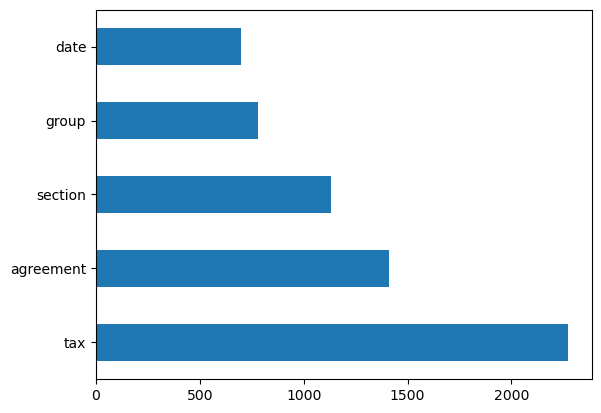

In [7]:

taxfreq = pd.Series(' '.join(dftaxes['Text_Data']).split()).value_counts()[:5]
taxfreq.plot(kind='barh');
plt.show()

In [8]:
dftaxes['Identifiers'] = 'tax,agreement,section,group,date'
dftaxes[:5]

,Text_Data,Category,Identifiers
0,tax indemnity agreement tax indemnity agreemen...,Taxes,"tax,agreement,section,group,date"
1,factor ii acquisition price series c share iss...,Taxes,"tax,agreement,section,group,date"
2,earnout dilution factor means respect earnout ...,Taxes,"tax,agreement,section,group,date"
3,turn appoint third appraiser determine fair v...,Taxes,"tax,agreement,section,group,date"
4,way diminution value notwithstanding anything ...,Taxes,"tax,agreement,section,group,date"


In [9]:
filepath='C:/Users/muppi/OneDrive/Desktop/c/RawData/Agreements'
agreementcontents = convert_pdf_to_txt(filepath)
dfagreement = pd.DataFrame(agreementcontents, columns = ['Text_Data']) 
dfagreement['Category'] = 'Agreement'

In [10]:
dfagreement['Text_Data'] = dfagreement['Text_Data'].apply(lambda x: " ".join(x.lower() for x in x.split()))
dfagreement['Text_Data'] = dfagreement['Text_Data'].str.replace('[^\w\s]','')
dfagreement['Text_Data'] = dfagreement['Text_Data'].str.replace('\d+', '') # remove numeric values from between the words
dfagreement['Text_Data'] = dfagreement['Text_Data'].apply(lambda x: x.translate(string.digits))
stop = stopwords.words('english')
dfagreement['Text_Data'] = dfagreement['Text_Data'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
stemmer = WordNetLemmatizer()
dfagreement['Text_Data'] = [stemmer.lemmatize(word) for word in dfagreement['Text_Data']]
dfagreement['Text_Data'] = dfagreement['Text_Data'].str.replace('shall', '')

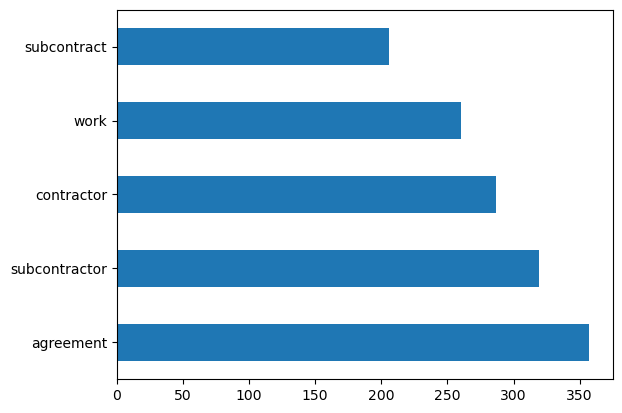

In [11]:
agfreq = pd.Series(' '.join(dfagreement['Text_Data']).split()).value_counts()[:5]
agfreq.plot(kind='barh');
plt.show()

In [12]:
dfagreement['Identifiers'] = 'agreement,subcontractor,contractor,work,subcontract'
dfagreement[:5]

,Text_Data,Category,Identifiers
0,agreement xxw amendment agreement among united...,Agreement,"agreement,subcontractor,contractor,work,subcon..."
1,act september stat designated colorado river b...,Agreement,"agreement,subcontractor,contractor,work,subcon..."
2,section party provides additional funding part...,Agreement,"agreement,subcontractor,contractor,work,subcon..."
3,witness whereof parties hereto executed amendm...,Agreement,"agreement,subcontractor,contractor,work,subcon..."
4,witness whereof parties hereto executed amendm...,Agreement,"agreement,subcontractor,contractor,work,subcon..."


In [13]:
filepath='C:/Users/muppi/OneDrive/Desktop/c/RawData/Deeds'
deedscontents = convert_pdf_to_txt(filepath)
dfdeeds = pd.DataFrame(deedscontents, columns = ['Text_Data']) 
dfdeeds['Category'] = 'Deeds'

In [14]:
dfdeeds['Text_Data'] = dfdeeds['Text_Data'].apply(lambda x: " ".join(x.lower() for x in x.split()))
dfdeeds['Text_Data'] = dfdeeds['Text_Data'].str.replace('[^\w\s]','')
dfdeeds['Text_Data'] = dfdeeds['Text_Data'].str.replace('\d+', '') # remove numeric values from between the words
dfdeeds['Text_Data'] = dfdeeds['Text_Data'].apply(lambda x: x.translate(string.digits))
stop = stopwords.words('english')
dfdeeds['Text_Data'] = dfdeeds['Text_Data'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
stemmer = WordNetLemmatizer()
dfdeeds['Text_Data'] = [stemmer.lemmatize(word) for word in dfdeeds['Text_Data']]
dfdeeds['Text_Data'] = dfdeeds['Text_Data'].str.replace('shall', '')

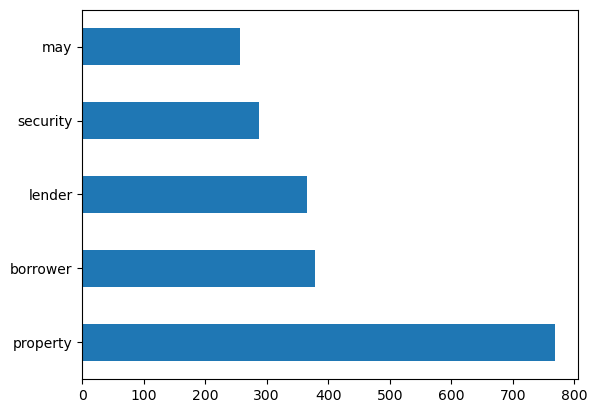

In [15]:
dfreq = pd.Series(' '.join(dfdeeds['Text_Data']).split()).value_counts()[:5]
dfreq.plot(kind='barh');
plt.show()

In [16]:
dfdeeds['Identifiers'] = 'property,borrower,lender,security,beneficiary'
dfdeeds[:5]

,Text_Data,Category,Identifiers
0,sample deed trust deed trust definitions words...,Deeds,"property,borrower,lender,security,beneficiary"
1,cid adjustable rate rider cid condominium ride...,Deeds,"property,borrower,lender,security,beneficiary"
2,q successor interest borrower means party take...,Deeds,"property,borrower,lender,security,beneficiary"
3,check drawn upon institution whose deposits in...,Deeds,"property,borrower,lender,security,beneficiary"
4,b leasehold payments ground rents property c p...,Deeds,"property,borrower,lender,security,beneficiary"


In [17]:
filepath='C:/Users/muppi/OneDrive/Desktop/c/RawData/Valuations'
valuationcontents = convert_pdf_to_txt(filepath)
dfvaluation = pd.DataFrame(valuationcontents, columns = ['Text_Data']) 
dfvaluation['Category'] = 'Valuations'

In [18]:
dfvaluation['Text_Data'] = dfvaluation['Text_Data'].apply(lambda x: " ".join(x.lower() for x in x.split()))
dfvaluation['Text_Data'] = dfvaluation['Text_Data'].str.replace('[^\w\s]','')
dfvaluation['Text_Data'] = dfvaluation['Text_Data'].str.replace('\d+', '') # remove numeric values from between the words
dfvaluation['Text_Data'] = dfvaluation['Text_Data'].apply(lambda x: x.translate(string.digits))
stop = stopwords.words('english')
stemmer = WordNetLemmatizer()
dfvaluation['Text_Data'] = [stemmer.lemmatize(word) for word in dfvaluation['Text_Data']]
dfvaluation['Text_Data'] = dfvaluation['Text_Data'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

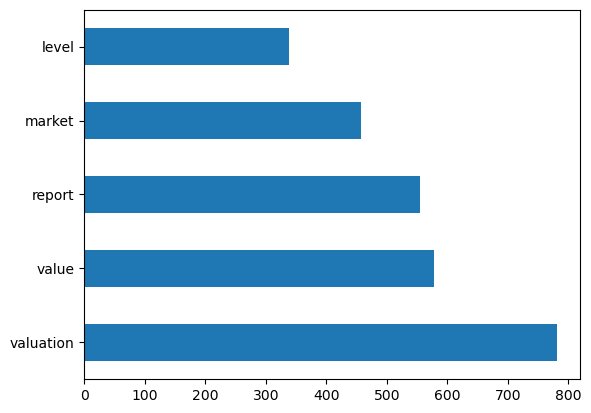

In [19]:
valfreq = pd.Series(' '.join(dfvaluation['Text_Data']).split()).value_counts()[:5]
valfreq.plot(kind='barh');
plt.show()

In [20]:
dfvaluation['Identifiers'] = 'valuation,value,report,market,level'
dfvaluation[:5]

,Text_Data,Category,Identifiers
0,valuation reportbusiness valuation trends stra...,Valuations,"valuation,value,report,market,level"
1,valuation report spring technical topicsthe im...,Valuations,"valuation,value,report,market,level"
2,spring valuation reportlitigation update dlom ...,Valuations,"valuation,value,report,market,level"
3,publication distributed understanding author p...,Valuations,"valuation,value,report,market,level"
4,november actuarialvaluationreportguaranteededu...,Valuations,"valuation,value,report,market,level"


In [21]:
filepath='C:/Users/muppi/OneDrive/Desktop/c/RawData/Human Resources'
hrcontents = convert_pdf_to_txt(filepath)
dfhr = pd.DataFrame(hrcontents, columns = ['Text_Data']) 
dfhr['Category'] = 'Human Resources'

In [22]:
dfhr['Text_Data'] = dfhr['Text_Data'].apply(lambda x: " ".join(x.lower() for x in x.split()))
dfhr['Text_Data'] = dfhr['Text_Data'].str.replace('[^\w\s]','')
dfhr['Text_Data'] = dfhr['Text_Data'].str.replace('\d+', '') # remove numeric values from between the words
dfhr['Text_Data'] = dfhr['Text_Data'].apply(lambda x: x.translate(string.digits))
stop = stopwords.words('english')
dfhr['Text_Data'] = dfhr['Text_Data'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
stemmer = WordNetLemmatizer()
dfhr['Text_Data'] = [stemmer.lemmatize(word) for word in dfhr['Text_Data']]
dfhr['Text_Data'] = dfhr['Text_Data'].str.replace('may', '')

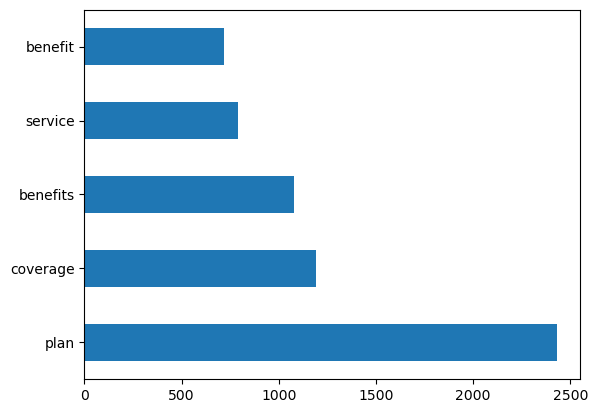

In [23]:
hrfreq = pd.Series(' '.join(dfhr['Text_Data']).split()).value_counts()[:5]
hrfreq.plot(kind='barh');
plt.show()

In [24]:
dfhr['Identifiers'] = 'plan,coverage,benefits,service,level'
dfhr[:5]

,Text_Data,Category,Identifiers
0,volunteer coordinators job description general...,Human Resources,"plan,coverage,benefits,service,level"
1,cid participate volunteer evaluations assigned...,Human Resources,"plan,coverage,benefits,service,level"
2,hiring company name texas ballet theater hirin...,Human Resources,"plan,coverage,benefits,service,level"
3,oversee community enrichment citydance outreac...,Human Resources,"plan,coverage,benefits,service,level"
4,dynamic energetic creative socially adept demo...,Human Resources,"plan,coverage,benefits,service,level"


In [25]:
frames = [dftaxes, dfagreement, dfdeeds, dfvaluation, dfhr]
finalframe = pd.concat(frames,sort=False)
finalframe = finalframe[['Identifiers','Text_Data','Category']]
finalframe = finalframe.reset_index(drop=True)
finalframe[:5]

,Identifiers,Text_Data,Category
0,"tax,agreement,section,group,date",tax indemnity agreement tax indemnity agreemen...,Taxes
1,"tax,agreement,section,group,date",factor ii acquisition price series c share iss...,Taxes
2,"tax,agreement,section,group,date",earnout dilution factor means respect earnout ...,Taxes
3,"tax,agreement,section,group,date",turn appoint third appraiser determine fair v...,Taxes
4,"tax,agreement,section,group,date",way diminution value notwithstanding anything ...,Taxes


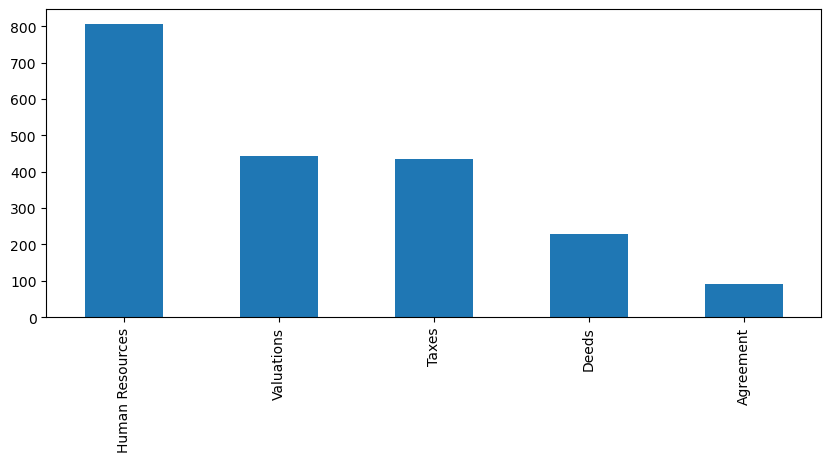

In [26]:
import matplotlib.pyplot as plt
my_tags = ['Agreements','Deeds','Taxes','Human Resources','Valuations']
plt.figure(figsize=(10,4))
finalframe.Category.value_counts().plot(kind='bar');
plt.show()

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer  
from sklearn.preprocessing import LabelEncoder
# Generating 1000 features for the input for the model
tfidfconverter = TfidfVectorizer(max_features=1000, stop_words=stopwords.words('english')) 
X = pd.DataFrame(tfidfconverter.fit_transform(finalframe['Text_Data']).toarray())
print(X[:5])
#X.columns = range(X.shape[1])
labelencoder = LabelEncoder() #Converting the labels to numeric labels
y = labelencoder.fit_transform(finalframe['Category'])

   0         1    2    3    4         5         6    7         8    9    ...  \
0  0.0  0.000000  0.0  0.0  0.0  0.000000  0.000000  0.0  0.000000  0.0  ...   
1  0.0  0.000000  0.0  0.0  0.0  0.000000  0.075627  0.0  0.000000  0.0  ...   
2  0.0  0.077873  0.0  0.0  0.0  0.057588  0.000000  0.0  0.000000  0.0  ...   
3  0.0  0.000000  0.0  0.0  0.0  0.000000  0.000000  0.0  0.000000  0.0  ...   
4  0.0  0.000000  0.0  0.0  0.0  0.000000  0.000000  0.0  0.061452  0.0  ...   

   990  991       992       993  994  995  996  997  998  999  
0  0.0  0.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.000000  0.062047  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.0  0.0  0.000000  0.059795  0.0  0.0  0.0  0.0  0.0  0.0  
4  0.0  0.0  0.042755  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 1000 columns]


In [28]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)  

In [29]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=1)
X_resampled, y_resampled = ros.fit_resample(X, y)

In [30]:
import numpy as np
unique, counts = np.unique(y_resampled, return_counts=True)
print(np.asarray((unique, counts)).T)

[[  0 807]
 [  1 807]
 [  2 807]
 [  3 807]
 [  4 807]]


In [31]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=0)  

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
classifier = RandomForestClassifier(n_estimators=1200, random_state=1)  #defining 1000 nodes 
rf = classifier.fit(X_train, y_train)  
y_pred = classifier.predict(X_test) 

Accuracy: 0.9405204460966543
                 precision    recall  f1-score   support

     Agreements       0.79      1.00      0.88       163
          Deeds       0.99      0.99      0.99       166
          Taxes       1.00      0.79      0.88       151
Human Resources       0.98      0.97      0.98       151
     Valuations       1.00      0.94      0.97       176

       accuracy                           0.94       807
      macro avg       0.95      0.94      0.94       807
   weighted avg       0.95      0.94      0.94       807

Confusion matrix:
 [[163   0   0   0   0]
 [  2 164   0   0   0]
 [ 29   0 119   3   0]
 [  4   0   0 147   0]
 [  8   2   0   0 166]]


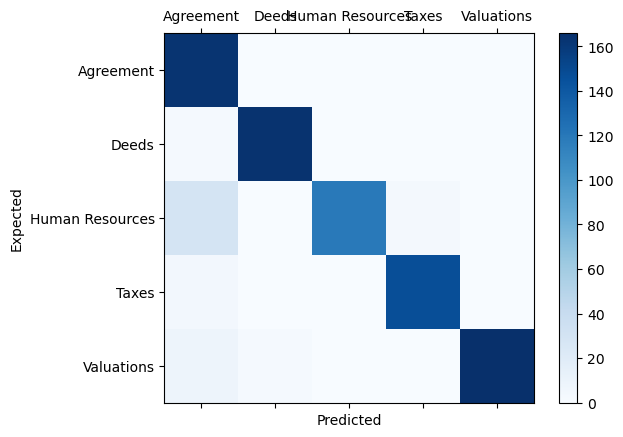

In [33]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print('Accuracy: %s' % accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred,target_names=my_tags))  
#print(confusion_matrix(y_test,y_pred)) 

conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

labels = ['Agreement', 'Deeds','Human Resources','Taxes','Valuations']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [34]:
import pickle
import requests
import json
pickle.dump(rf, open('rfmodel.pkl','wb'))

Accuracy: 0.9231722428748451
                 precision    recall  f1-score   support

     Agreements       0.96      0.83      0.89       163
          Deeds       0.96      0.95      0.95       166
          Taxes       0.80      0.98      0.88       151
Human Resources       0.96      0.94      0.95       151
     Valuations       0.96      0.92      0.94       176

       accuracy                           0.92       807
      macro avg       0.93      0.92      0.92       807
   weighted avg       0.93      0.92      0.92       807

Confusion matrix:
 [[136   2  23   0   2]
 [  2 157   2   2   3]
 [  1   0 148   2   0]
 [  2   1   5 142   1]
 [  1   3   8   2 162]]


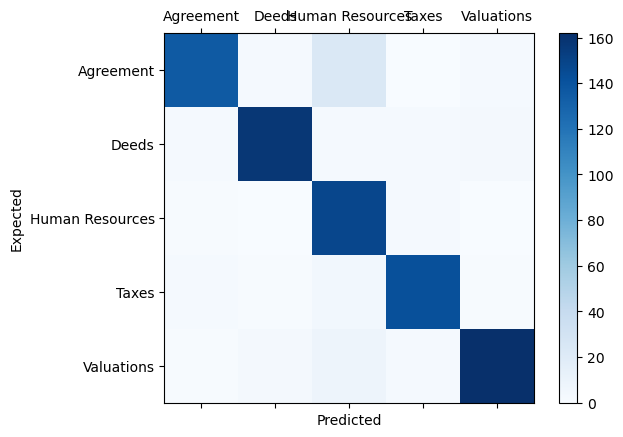

In [35]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train, y_train)

y_pred = clf.predict(X_test)
print('Accuracy: %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))

conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

labels = ['Agreement', 'Deeds','Human Resources','Taxes','Valuations']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [36]:
pickle.dump(clf, open('nbmodel.pkl','wb'))

Accuracy: 0.9479553903345725
                 precision    recall  f1-score   support

     Agreements       0.99      0.86      0.92       163
          Deeds       0.98      0.99      0.98       166
          Taxes       0.80      0.99      0.88       151
Human Resources       0.99      0.97      0.98       151
     Valuations       1.00      0.94      0.97       176

       accuracy                           0.95       807
      macro avg       0.95      0.95      0.95       807
   weighted avg       0.96      0.95      0.95       807

Confusion matrix:
 [[140   0  23   0   0]
 [  0 164   2   0   0]
 [  1   0 149   1   0]
 [  0   0   4 147   0]
 [  0   3   8   0 165]]


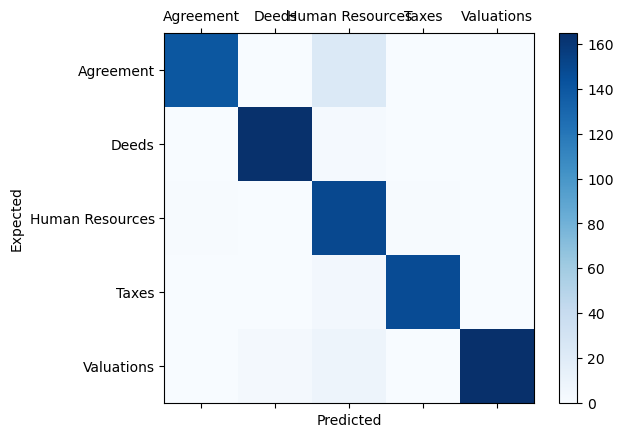

In [37]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %s" % (accuracy))
print(classification_report(y_test, y_pred,target_names=my_tags))

conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

labels = ['Agreement', 'Deeds','Human Resources','Taxes','Valuations']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [38]:
pickle.dump(xgb, open('xgbmodel.pkl','wb'))

Word2Vec model

In [39]:
import os
import gensim
from gensim.models import Word2Vec
file_path = os.path.join(os.getcwd(),"GoogleNews-vectors-negative300.bin.gz")
wv = gensim.models.KeyedVectors.load_word2vec_format(file_path, binary=True) # Pre-trained word vectors
# wv.init_sims(replace=True)

In [40]:
finalframe['Text_Data'].apply(lambda x: len(x.split(' '))).sum()
finalframe['Identifiers'].apply(lambda x: len(x.split(' '))).sum()

2005

In [41]:
# Defining function to assign vectors from pre-trained model
def word_averaging(wv, words):
    all_words, mean = set(), []
    
    for word in words:
        if isinstance(word, np.ndarray):
            mean.append(word)
        elif word in wv.key_to_index:
            mean.append(wv.vectors[wv.key_to_index[word]])
            all_words.add(wv.key_to_index[word])

    if not mean:
        return np.zeros(wv.vector_size,)

    mean = gensim.matutils.unitvec(np.array(mean).mean(axis=0)).astype(np.float32)
    return mean

def  word_averaging_list(wv, text_list):
    return np.vstack([word_averaging(wv, post) for post in text_list ])

In [42]:
#function to split indiviual words from the sentences
def w2v_tokenize_text(text):
    tokens = []
    for sent in nltk.sent_tokenize(text, language='english'):
        for word in nltk.word_tokenize(sent, language='english'):
            if len(word) < 2 and len(word) > 12:
                continue
            tokens.append(word)
    return tokens

In [43]:
import nltk
train, test = train_test_split(finalframe, test_size=0.3, random_state = 42)
test_tokenized = test.apply(lambda r: w2v_tokenize_text(r['Text_Data']), axis=1).values
label_test_tokenized = test.apply(lambda r: w2v_tokenize_text(r['Category']), axis=1).values
train_tokenized = train.apply(lambda r: w2v_tokenize_text(r['Text_Data']), axis=1).values

In [44]:
import numpy as np
X_train_word_average = word_averaging_list(wv,train_tokenized)
X_test_word_average = word_averaging_list(wv,test_tokenized)
y_test_word_average = word_averaging_list(wv,label_test_tokenized)

In [45]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(n_jobs=1, C=1e5)
logreg = logreg.fit(X_train_word_average, train['Category'])
y_pred = logreg.predict(X_test_word_average)

In [46]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
print('accuracy %s' % accuracy_score(y_pred, test.Category))
print(classification_report(test.Category, y_pred,target_names=my_tags))

accuracy 0.9352159468438538
                 precision    recall  f1-score   support

     Agreements       0.91      0.81      0.86        26
          Deeds       0.84      0.96      0.89        71
          Taxes       0.93      0.98      0.95       244
Human Resources       0.98      0.88      0.93       136
     Valuations       0.98      0.92      0.95       125

       accuracy                           0.94       602
      macro avg       0.93      0.91      0.92       602
   weighted avg       0.94      0.94      0.94       602



In [47]:
pickle.dump(logreg, open('w2vmodel.pkl','wb'))

In [48]:
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from gensim.models import doc2vec
from sklearn import utils
import gensim
import re
from gensim.models.doc2vec import TaggedDocument


In [49]:
def label_sentences(corpus, label_type):
    labeled = []
    for i, v in enumerate(corpus):
        label = label_type + '_' + str(i)
        labeled.append(doc2vec.TaggedDocument(v.split(), [label]))
    return labeled

In [50]:
# LabeledSentence = gensim.models.deprecated.doc2vec.LabeledSentence
X_train, X_test, y_train, y_test = train_test_split(finalframe.Text_Data, finalframe.Category, random_state=2, test_size=0.3)
X_train = label_sentences(X_train, 'Train')
X_test = label_sentences(X_test, 'Test')
all_data = X_train + X_test

In [51]:
X_train[2:4]

[TaggedDocument(words=['page', 'step', 'design', 'implement', 'career', 'development', 'strategies', 'strategic', 'leadership', 'team', 'evaluated', 'bench', 'strength', 'prioritized', 'key', 'leadership', 'positions', 'attention', 'shifts', 'continued', 'career', 'development', 'employees', 'determined', 'eligible', 'potentially', 'eligible', 'positions', 'step', 'succession', 'planning', 'process', 'focused', 'helping', 'employees', 'managers', 'discuss', 'career', 'development', 'plans', 'discussing', 'encouraging', 'career', 'development', 'employees', 'important', 'part', 'management', 'however', 'purpose', 'succession', 'planning', 'increasing', 'bench', 'strength', 'specified', 'areas', 'selection', 'subset', 'employees', 'upon', 'focus', 'career', 'development', 'efforts', 'necessary', 'annual', 'performance', 'review', 'session', 'provides', 'excellent', 'opportunity', 'begin', 'discussions', 'career', 'development', 'goal', 'opportunities', 'however', 'managers', 'need', 'kee

In [52]:
model_dbow = Doc2Vec()
model_dbow.build_vocab([x for x in tqdm(all_data)])

100%|██████████████████████████████████████████████████████████████████████████████████████| 2005/2005 [00:00<?, ?it/s]


In [53]:
for epoch in range(45):
    model_dbow.train(utils.shuffle([x for x in tqdm(all_data)]), total_examples=len(all_data), epochs=1)
    model_dbow.alpha -= 0.002
    model_dbow.min_alpha = model_dbow.alpha

100%|█████████████████████████████████████████████████████████████████████████| 2005/2005 [00:00<00:00, 1928360.36it/s]


In [54]:
def get_vectors(model, corpus_size, vectors_size, vectors_type):
    vectors = np.zeros((corpus_size, vectors_size))
    for i in range(0, corpus_size):
        prefix = vectors_type + '_' + str(i)
        vectors[i] = model.docvecs[prefix]
    return vectors

In [55]:
train_vectors_dbow = get_vectors(model_dbow, len(X_train), 100, 'Train')
test_vectors_dbow = get_vectors(model_dbow, len(X_test), 100, 'Test')

In [56]:
logreg = LogisticRegression()
logreg.fit(train_vectors_dbow, y_train)

LogisticRegression()

In [57]:
logreg = logreg.fit(train_vectors_dbow, y_train)
y_pred = logreg.predict(test_vectors_dbow)

In [58]:
print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))

accuracy 0.8571428571428571
                 precision    recall  f1-score   support

     Agreements       0.96      0.71      0.81        34
          Deeds       0.83      0.60      0.70        63
          Taxes       0.80      0.98      0.88       258
Human Resources       0.96      0.87      0.91       126
     Valuations       0.90      0.77      0.83       121

       accuracy                           0.86       602
      macro avg       0.89      0.78      0.83       602
   weighted avg       0.87      0.86      0.85       602



Demo of the trained model in action

In [94]:
savedmodel = pickle.load(open('nbmodel.pkl','rb'))
demofile = 'demo1.pdf'

In [88]:
# Parsing through the sample document and extracting the textual data
def convert2txt():
    alltexts = []
    with open(demofile, 'rb') as fh:
        rsrcmgr = PDFResourceManager()
        retstr = StringIO()
        codec = 'utf-8'
        laparams = LAParams()
        device = TextConverter(rsrcmgr, retstr,laparams=LAParams())
        fp = open(demofile, 'rb')
        interpreter = PDFPageInterpreter(rsrcmgr, device)
        password = ""
        maxpages = 0
        caching = True
        pagenos=set()

        for page in PDFPage.get_pages(fp, pagenos, maxpages=maxpages, password=password,caching=caching, check_extractable=True):
            interpreter.process_page(page)

        text = retstr.getvalue()
        alltexts.append(text)
        fp.close()
        device.close()
        retstr.close()
        
    return alltexts 

pip install --upgrade gensim --user

In [89]:
textdata = convert2txt()

In [90]:
# Feature engineering to get the data in right format
dfdemo = pd.DataFrame(textdata, columns = ['Data'])
dfdemo['Data'] = dfdemo['Data'].apply(lambda x: " ".join(x.lower() for x in x.split())) # lower case conversion
dfdemo['Data'] = dfdemo['Data'].str.replace('[^\w\s]','') # getting rid of special characters
dfdemo['Data'] = dfdemo['Data'].str.replace('\d+', '') # removing numeric values from between the words
dfdemo['Data'] = dfdemo['Data'].apply(lambda x: x.translate(string.digits)) # removing numerical numbers
stop = stopwords.words('english')
dfdemo['Data'] = dfdemo['Data'].apply(lambda x: " ".join(x for x in x.split() if x not in stop)) #removing stop words
stemmer = WordNetLemmatizer()
dfdemo['Data'] = [stemmer.lemmatize(word) for word in dfdemo['Data']]

In [93]:
# Assigning vectors to the input data
tfidfconverter = TfidfVectorizer(max_features=1000, stop_words=stopwords.words('english'))
inputs = pd.DataFrame(tfidfconverter.fit_transform(dfdemo['Data']).toarray())
inputs

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.002158,0.004316,0.01079,0.01079,0.004316,0.004316,0.004316,0.004316,0.008632,0.012948,...,0.004316,0.002158,0.021581,0.017265,0.004316,0.006474,0.021581,0.012948,0.019423,0.004316


In [96]:
# Predicting the category of the input file with the help of trained model

output_category = savedmodel.predict(inputs)
#Comment the next line if you are testing word2vec model as it doesn't require transformation
output_category = (labelencoder.inverse_transform((output_category)))
output_category

array(['Human Resources'], dtype=object)